In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [17]:
data = pd.read_csv('mathawards.csv')
data.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


In [18]:
model = glm('num_awards ~ math', data = data, family = sm.families.Poisson())

In [19]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -190.04
Date:                Wed, 18 Sep 2024   Deviance:                       204.02
Time:                        23:22:41   Pearson chi2:                     229.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3418
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3335      0.591     -9.021      0.000      -6.492      -4.175
math           0.0862      0.010      8.902      0.000       0.067       0.105
==============================================================================
"""

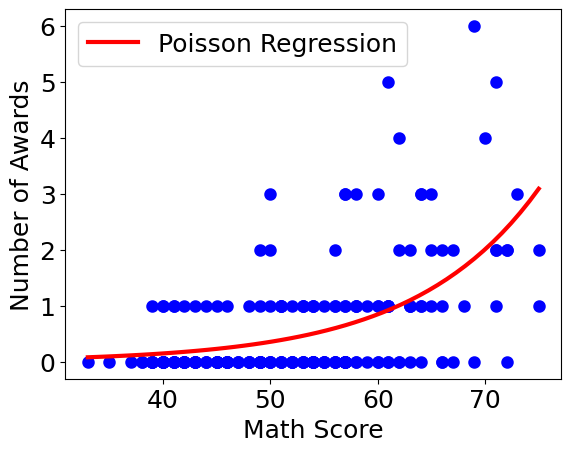

In [20]:
x = np.linspace(data['math'].min(),data['math'].max(),50)
y = np.exp(x*results.params[1] + results.params[0])

plt.scatter(data['math'], data['num_awards'], linewidth=3, color='blue')
plt.plot(x, y, label = 'Poisson Regression', color='red', linewidth=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Math Score', fontsize=18)
plt.ylabel('Number of Awards', fontsize=18 )
plt.legend(fontsize=18)